<a href="https://colab.research.google.com/github/N-itotia/Grointerview/blob/main/nigelitotia_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install NLTK

In [ ]:
import pandas as pd
import re
from re import search
import matplotlib.pyplot as plt
import csv
import spacy
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 

In [ ]:
#opening tha datas
data1 = pd.read_csv('Gro/source_1.csv')
data2 = pd.read_csv('Gro/source_2.csv')

In [ ]:
data3 = {'id_s1':[],
        'name_s1':[],
         'id_s2':[],
         'name_s2':[],
         'method_used':[]
         }
 
# Create DataFrame
result_df = pd.DataFrame(data3)

result_df

In [ ]:
#regex
def find_before_semicolon(input):
    #input = "Seed; beet seed, (excluding sugar beet), of a kind used for sowing"
    try:
      string_pattern = r"[a-zA-Z]+"
      regex_pattern = re.compile(string_pattern, re.IGNORECASE)
      result = regex_pattern.findall(input)
      firstdigit = result[0]
    except:
      firstdigit = input
    
    return firstdigit;


In [ ]:
#looks for synonyms between source1 & source 2
#takes in a row and returns sysonym of word before ;
def synonym_finder(dataset_row):
  dataset_row = find_before_semicolon(dataset_row)

  synonyms = []

  for syn in wordnet.synsets(dataset_row):
      for l in syn.lemmas():
          synonyms.append(l.name())
          

  return set(synonyms)


In [ ]:
#looping through source 2 searching source 1
#if found delete row in source 2 and add deleted to matched data
fullstring = data1.name
substring = data2.name


#for idx, row_s1 in enumerate(data1.itertuples(),1):
    #fullstring = row_s1.name

for i, row_s2 in enumerate(data2.itertuples(),1):
  substring = row_s2.name
  contain_values = data1[data1['name'].str.contains(row_s2.name)]
  print(contain_values)

  #if search(substring, fullstring):
  for ig, row_s1 in enumerate(contain_values.itertuples(),1):        
    result_df = result_df.append({'id_s1': row_s1.id, 
                                    'name_s1': row_s1.name, 
                                    'id_s2': row_s2.id,
                                    'name_s2': row_s2.name, 
                                    'method_used': "substring method"}, ignore_index=True)
    
    data2= data2.drop(data2.index[i])
      #data2.drop(row_s2.id,axis=1, inplace=True)

else:
  print ("Not found!")

In [ ]:
#for loop throuhg source1 pass row of source 1 to syn finder if it has syn loop thourgh sysn 
#if sysn are in source 2 write to final and delete from source 2

for igx, row_s1 in enumerate(data1.itertuples(),1):
  print(row_s1.name)
  found_synonyms = synonym_finder(row_s1.name)

  for synonym in found_synonyms:
    synonym = synonym.replace('_', ' ')
    loop_syn = data2[data2['name'].str.contains(synonym)]
  
    for ig, row_s2 in enumerate(loop_syn.itertuples(),1):
      result_df = result_df.append({'id_s1': row_s1.id, 
                                        'name_s1': row_s1.name, 
                                        'id_s2': row_s2.id,
                                        'name_s2': row_s2.name, 
                                        'method_used': "synonym method"}, ignore_index=True)
          
      data2= data2.drop(data2.index[ig])




In [ ]:
result_df

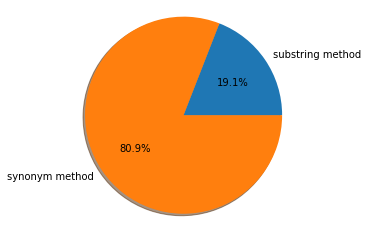

In [ ]:
#pie charts
labels = result_df['method_used'].astype('category').cat.categories.tolist()
counts = result_df['method_used'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


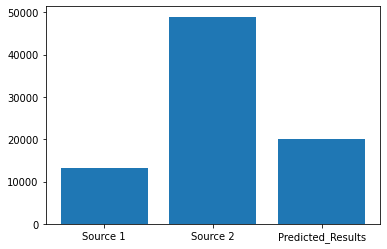

In [ ]:
#barcharts
# Create a List of Labels for x-axis
data2 = pd.read_csv('Gro/source_2.csv')

titles = ["Source 1", "Source 2", "Predicted_Results"]

# Create a List of Values (Same Length as Names List)
number_of_rows = [len(data1),len(data2), len(result_df)]

# Make the Chart
plt.bar(titles, number_of_rows)

# Show the Chart
plt.show()

In [ ]:
result_df.to_excel(r'predicted.xlsx', index = False)